In [1]:
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt

In [2]:
import sys
from IPython.display import clear_output

In [3]:
from qutip import *
import numpy as np
from scipy.constants import *
from scipy import sqrt, log

In [4]:
font = {'size'   : 15}

matplotlib.rc('font', **font)

In [5]:
def format_time(time_sec):
    hours = time_sec//3600
    minutes = (time_sec%3600)//60
    seconds = time_sec - hours*3600 - minutes*60
    return hours, minutes, seconds

# Описание системы

### Параметры, гамильтониан, возмущения

In [6]:
N = 20

#Unitary evolution parameters
omega_r = 1 * 2*pi
omega_q = .6 * 2*pi
A = 0.0005
B = 0.1 
g=.0025*omega_r
omega_f = 0.9*2*pi
delta = 0

#Dissipation
kappa=0.01
gamma_deph = 0.01
gamma_rel = 0.01

def a():
    return destroy(N)

def build_H_undr(omega_q = 0.6*omega_r, delta = 0):
    H_q = tensor(identity(N), sigmaz()*sqrt(omega_q**2+delta**2)/2)
    H_r = tensor(omega_r*(1/2+a().dag()*a()), identity(2))
    H_int = g*tensor(a() + a().dag(), delta/sqrt(omega_q**2+delta**2)*sigmaz()-
                     omega_q/sqrt(omega_q**2+delta**2)*sigmax())
    return H_q+H_r +H_int

def build_H_undr_test(omega_q = 0.6*omega_r, delta = 0):
    H_r = tensor((1/2 + a().dag()*a())*omega_r, identity(2))
    H_q = tensor(identity(N), sigmaz()*omega_q/2+sigmax()*delta/2)
    H_int = g*tensor(a()+a().dag(), sigmax())
    return H_r+H_q+H_int

##Driving
def build_H_dr_fl():
    return [A*tensor(destroy(N)+create(N), identity(2)), "np.sin(omega_f*t)"]

def build_H_dr(t_on=0, t_off=1000):
    return [A*tensor(destroy(N)+create(N), identity(2)), "np.sin(omega_f*t)/(1+np.exp(-t+%d))/(1+np.exp(t-%d))"%(t_on, t_off)]

def build_H_dr_q(t_on=200, t_off=231):
    return [B*tensor(identity(N), sigmax()), "np.sin(omega_f_q*t)/(1+np.exp(-t+%d))/(1+np.exp(t-%d))"%(t_on, t_off)]

##

def build_H():
    return [build_H_undr(), build_H_dr()]
def build_c_ops():
    return [tensor(identity(N), sqrt(gamma_rel)*sigmam()), tensor(identity(N), sqrt(gamma_deph)*sigmaz()), 
            tensor(sqrt(kappa)*destroy(N), identity(2))]

### Расчет стационарных состояний

In [7]:
def evals(omega_q = 0.6*omega_r, delta = 0):
    return build_H_undr(omega_q, delta).eigenenergies()
def evecs(omega_q = 0.6*omega_r, delta = 0):
    return build_H_undr(omega_q, delta).eigenstates()[1]

In [8]:
(evals(omega_q=0.2*omega_r)[1]-evals(omega_q=0.2*omega_r)[0])/0.2/omega_r

0.99998697926556557

### Отслеживание параметров

In [9]:
def description(comment):
    params = {}
    params["omega_r"] = omega_r
    params["omega_q"] = omega_q/omega_r
    params["A"] = A
    params["B"] = B
    params["g"] = g/omega_r
    params["N"] = N
    params["kappa"] = kappa
    params["gamma_deph"] = gamma_deph
    params["gamma_rel"] = gamma_rel
    params["comment"] = comment
    return params

# Дисперсионное считывание

In [145]:
## Test
opts = Options()
opts.nsteps = 5000

args={'omega_f':(evals()[2]-evals()[0]), "omega_f_q":(evals()[1]-evals()[0])}

A = 0.02
B=0.1
g=0.1
N = 25
Ts = np.linspace(0, 1000, 800)
kappa=0.08

outp1 = mesolve([build_H_undr(), build_H_dr()], 
                 evecs()[0],  Ts,\
                    build_c_ops(), [tensor(num(N), identity(2)), tensor(identity(N), sigmam().dag()*sigmam())],
                    args,  progress_bar=True, options=opts)

10.0%. Run time:  18.60s. Est. time left: 00:00:02:47
20.0%. Run time:  37.63s. Est. time left: 00:00:02:30
30.0%. Run time:  56.52s. Est. time left: 00:00:02:11
40.0%. Run time:  76.31s. Est. time left: 00:00:01:54
50.0%. Run time: 102.93s. Est. time left: 00:00:01:42
60.0%. Run time: 131.97s. Est. time left: 00:00:01:27
70.0%. Run time: 162.76s. Est. time left: 00:00:01:09
80.0%. Run time: 193.55s. Est. time left: 00:00:00:48
90.0%. Run time: 225.55s. Est. time left: 00:00:00:25
Total run time: 253.46s


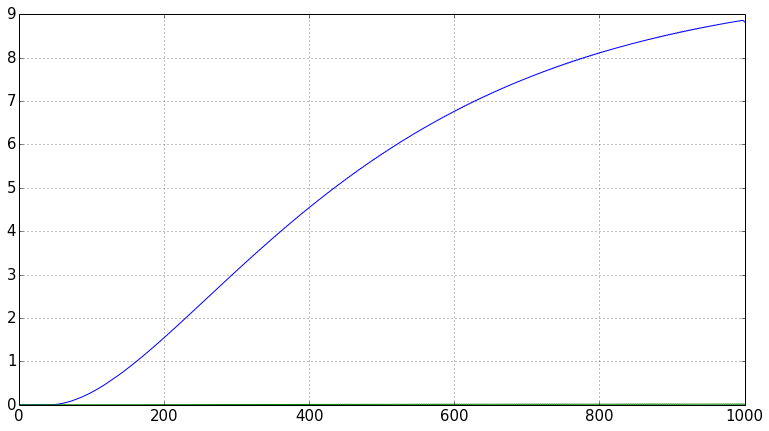

In [146]:
plt.plot(Ts, outp1.expect[0], label = r"$\langle N \rangle$")
plt.plot(Ts, outp1.expect[1], label = r"$|\langle \psi\ | \uparrow \rangle|^2$")
plt.grid()
# plt.legend(loc = "upper left", fontsize=20)
plt.gcf().set_size_inches(13,7)

In [203]:

args={'omega_f':(evals()[2]-evals()[0]), "omega_f_q":omega_q}

N=25
gamma = 0
Ts = np.linspace(0, 1000, 800)
outp2 = mesolve([build_H_undr(), build_H_dr(200, 1200), build_H_dr_q()], evecs()[0],  Ts,
                    build_c_ops() , [tensor(num(N), identity(2)), 
                    tensor(identity(N), sigmam().dag()*sigmam())],
                    args,  progress_bar=True, options=opts)

10.0%. Run time:   8.72s. Est. time left: 00:00:01:18
20.0%. Run time:  18.04s. Est. time left: 00:00:01:12
30.0%. Run time:  44.38s. Est. time left: 00:00:01:43
40.0%. Run time:  67.44s. Est. time left: 00:00:01:41
50.0%. Run time:  90.02s. Est. time left: 00:00:01:30
60.0%. Run time: 112.62s. Est. time left: 00:00:01:15
70.0%. Run time: 135.42s. Est. time left: 00:00:00:58
80.0%. Run time: 159.22s. Est. time left: 00:00:00:39
90.0%. Run time: 182.90s. Est. time left: 00:00:00:20
Total run time: 205.70s


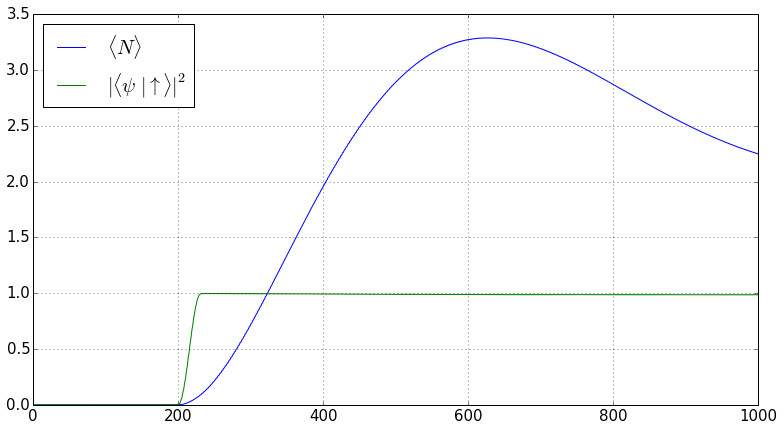

In [204]:
plt.plot(Ts, outp2.expect[0], label = r"$\langle N \rangle$")
plt.plot(Ts, outp2.expect[1], label = r"$|\langle \psi\ | \uparrow \rangle|^2$")
plt.grid()
plt.legend(loc = "upper left", fontsize=20)
plt.gcf().set_size_inches(13,7)

# Двухтоновая спектроскопия

In [284]:
build_H_dr_q(1, 1500)[1]

'np.sin(omega_f_q*t)/(1+np.exp(-t+1))/(1+np.exp(t-1500))'

In [309]:
opts = Options(rhs_reuse=True)
opts.nsteps=5000

args={'omega_f':(evals()[2]-evals()[0]), "omega_f_q":0.5*(evals()[1]-evals()[0])}

N=8
kappa = 0
gamma = 0
A = 0.005
B = 0.1
Ts = np.linspace(0, 700, 800)

def task(omega_f_q):
    args["omega_f_q"] = omega_f_q
    return mesolve([build_H_undr(), build_H_dr(1, 1500), build_H_dr_q(1, 1500)], evecs()[0],  Ts,
                    [] , [tensor(num(N), identity(2)), 
                    tensor(identity(N), sigmam().dag()*sigmam())],
                    args, options=opts)

parallel_map(task, ((evals()[1]-evals()[0]), 0.5*(evals()[1]-evals()[0])), progress_bar=True)

50.0%. Run time:  16.28s. Est. time left: 00:00:00:16
100.0%. Run time:  16.71s. Est. time left: 00:00:00:00
Total run time:  16.75s


[Result object with sesolve data.
 --------------------------------
 expect = True
 num_expect = 2, num_collapse = 0, Result object with sesolve data.
 --------------------------------
 expect = True
 num_expect = 2, num_collapse = 0]

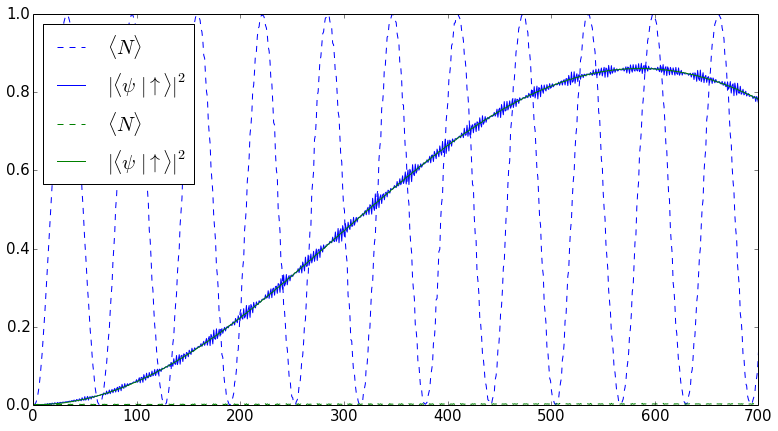

In [308]:
plt.plot(Ts, _[0].expect[1], "b--", label = r"$\langle N \rangle$")
plt.plot(Ts, _[0].expect[0], "b", label = r"$|\langle \psi\ | \uparrow \rangle|^2$")
plt.plot(Ts, _[1].expect[1], "g--", label = r"$\langle N \rangle$")
plt.plot(Ts, _[1].expect[0], "g", label = r"$|\langle \psi\ | \uparrow \rangle|^2$")
plt.grid()
plt.grid()
plt.legend(loc = "upper left", fontsize=20)
plt.gcf().set_size_inches(13,7)

In [477]:
opts = Options()
opts.rhs_reuse = True

N=8
kappa = 0
gamma = 0
Ts = np.linspace(0, 700, 800)
opts.nsteps = 5000

deltas = np.linspace(0.9*omega_r, 1.1*omega_r, 50)
omega_f_qs = np.linspace(0.85*omega_r, 1.1*omega_r, 50)

def parallel_task(delta):
    return mesolve([build_H_undr(omega_q = 0.2*omega_r, delta=delta), 
                        build_H_dr(0, 700), build_H_dr_q(0, 700)], evecs()[0],  Ts,
                        [] , [tensor(num(N), identity(2)), 
                        tensor(identity(N), sigmam().dag()*sigmam())],
                        args, options=opts).expect[0][-1]

def calculate():
    results = []
    for idx, omega_f_q in enumerate(omega_f_qs):
        print("\r%d%%"%round(idx/len(omega_f_qs)*100, 0), end='') 
        args["omega_f_q"] = omega_f_q
        results.append(parallel_map(parallel_task, deltas))   
    return results


results = calculate()

98%

In [479]:
data2 = np.zeros((len(omega_f_qs), 2*len(deltas)-1))
for idx, result in enumerate(results):
    for idx2 in range(0,len(deltas)):
        data2[idx, idx2+len(deltas)-1] = result[idx2]
#         data2[idx, len(deltas)-idx2-1] = result[idx2]

In [481]:
data2 = np.zeros((len(omega_f_qs), len(deltas)))
for idx, result in enumerate(results):
    for idx2 in range(0,len(deltas)):
        data2[idx, idx2] = result[idx2]

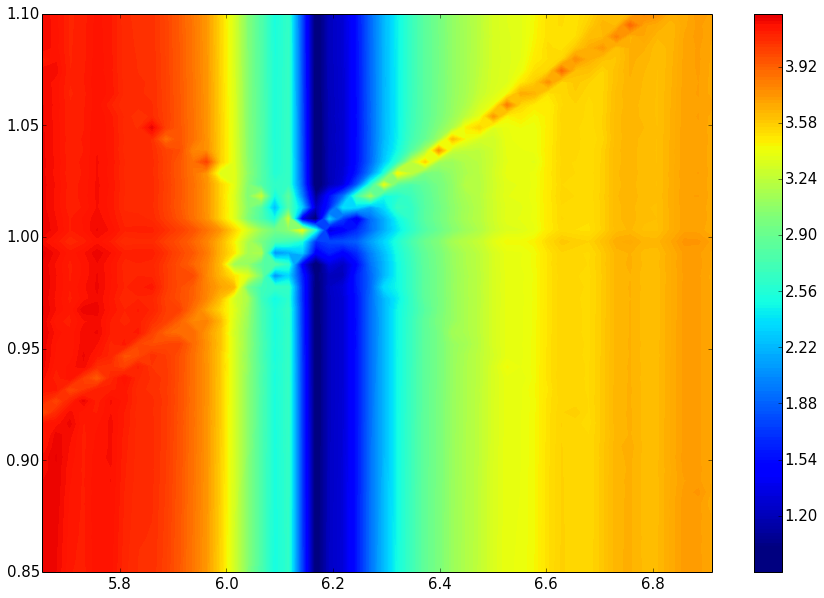

In [494]:
XX, YY = np.meshgrid(deltas, omega_f_qs/omega_r)
plt.contourf(XX, YY, data2, 200, norm=MidpointNorm(3, vmin=1, vmax = 4.5))#, cmap='RdBu_r')
plt.gcf().set_size_inches(15,10)
plt.colorbar()

(0.9, 1.1)

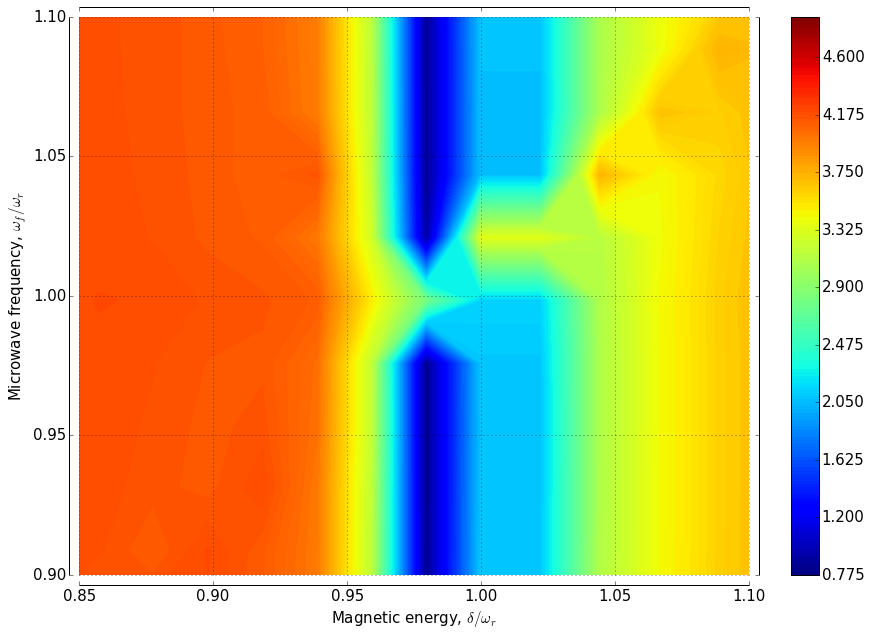

In [476]:
XX, YY = np.meshgrid(np.concatenate((-deltas2[1:][::-1],deltas2))/omega_r, omega_f_qs/omega_r)
plt.contourf(XX, YY, data2, 200)#, norm=MidpointNorm(4.5, vmin=3.8, vmax = 5))#, cmap='RdBu_r')
plt.gcf().set_size_inches(15,10)
plt.colorbar()
dict(plt.gca().spines.items())["left"].set_position(('outward', 10))
dict(plt.gca().spines.items())["bottom"].set_position(('outward', 10))
dict(plt.gca().spines.items())["top"].set_position(('outward', 10))
dict(plt.gca().spines.items())["right"].set_position(('outward', 10))
plt.xlabel(r"Magnetic energy, $\delta/\omega_r$")
plt.ylabel("Microwave frequency, $\omega_f/\omega_r$")
plt.grid()
plt.xlim(0.85,1.1)
plt.ylim(0.9, 1.1)

In [467]:
import pickle
with open("two_tone2.pkl", "w+b") as f:
    pickle.dump((np.concatenate((-deltas2[1:][::-1],deltas2)), omega_f_qs/omega_r, data2), f)

# Квазипересечение

In [16]:
import time

opts = Options()
opts.rhs_reuse = True
opts.nsteps = 1e4
rhs_clear()

args={}

N=3
kappa = 5e-4
gamma_rel = .02
gamma_deph =.01
g=0.007*omega_r
A = 1e-5
omega_q = 0.2*omega_r

deltas = np.linspace(-1.2*omega_r, 1.2*omega_r, 30)
omega_fs = np.linspace(0.9995*omega_r, omega_r*1.0005, 30)

def parallel_task(omega_f, H):
    
    args["omega_f"] = omega_f
    T = 2*pi/args["omega_f"]
   
    U = propagator([H, build_H_dr(0, 1e3)], T, [], args, options=opts)
    psi_st = propagator_steadystate(U)
    return expect(tensor(destroy(N), identity(2)), psi_st)

def calculate():
    results = []
    time_start = time.time()
    print(description("qubit_huge_relaxation, T_end=5k"))
    print("\r%d%%"%0, "Time left: ?", end='') 

    for idx, delta in enumerate(deltas):
        
        H = liouvillian(build_H_undr(omega_q=0.2*omega_r, delta=delta), build_c_ops_new(omega_q=0.2*omega_r, delta=delta))
        
        result = parallel_map(parallel_task, omega_fs, task_args = (H,))
        results.append(result)
        
        percents_done = round((idx+1)/len(deltas)*100, 2)
        time_left = format_time((time.time()-time_start)*(100-percents_done)/percents_done)
        print("\r%.2f%%"%percents_done, "Time left: ", "%d h, %d m, %.1f s"%(time_left)
              , "Elapsed time: %d h, %d m, %.1f s"%(format_time((time.time()-time_start))), end = "") 
    print("\nElapsed time: %d h, %d m, %.1f s"%(format_time((time.time()-time_start))))
    return results


results = calculate()

{'comment': 'qubit_huge_relaxation, T_end=5k', 'kappa': 0.0005, 'gamma_deph': 0.01, 'omega_r': 6.283185307179586, 'omega_q': 0.2, 'N': 3, 'A': 1e-05, 'gamma_rel': 0.02, 'B': 0.1, 'g': 0.007}
100.00% Time left:  0 h, 0 m, 0.0 s Elapsed time: 0 h, 6 m, 6.4 s
Elapsed time: 0 h, 6 m, 6.4 s


In [44]:
data2

array([[  4.61422429e-05,   4.59488953e-05,   4.56946469e-05, ...,
          4.64096696e-05,   4.64885861e-05,   4.65546145e-05],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

In [37]:
data2 = np.zeros((len(omega_fs), len(deltas)))
for idx, result in enumerate(results):
    for idx2 in range(0,len(omega_fs)):
        data2[idx, idx2] = abs(result[idx2])**2

IndexError: list index out of range

In [88]:
freqs1 = []
freqs2 = []
X = np.linspace(-1*omega_r, 1*omega_r, 100)
for delta in X:
    vals = evals(omega_q=0.2*omega_r, delta=delta)
    freqs1.append(vals[1]-vals[0])
    freqs2.append(vals[2]-vals[0])

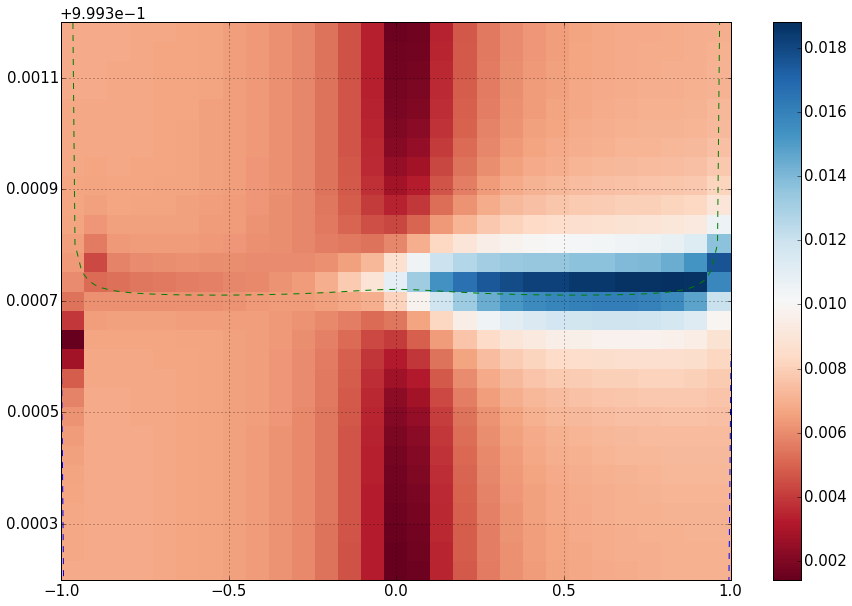

In [27]:
XX, YY = np.meshgrid(deltas/omega_r, omega_fs/omega_r)
plt.pcolor(XX, YY, data2.T, cmap="RdBu")#, 200, cmap="RdBu")#, norm=MidpointNorm(3, vmin=1, vmax = 4.5))#, cmap='RdBu_r')
plt.plot(X/omega_r, np.array(freqs1)/omega_r, "--")
plt.plot(X/omega_r, np.array(freqs2)/omega_r, "--")
plt.gcf().set_size_inches(15,10)
plt.xlim(-1.0, 1)
plt.ylim(0.9995, 1.0005)
plt.colorbar()
plt.grid()

In [175]:
import pickle
with open("anticrossing_3dsuccess_qubit_decoherence.pkl", "w+b") as f:
    pickle.dump((deltas/omega_r, omega_fs/omega_r, data2, description("Third success")), f)

In [84]:
import pickle
with open("anticrossing_3dsuccess_qubit_decoherence.pkl", "r+b") as f:
    loaded = pickle.load(f)

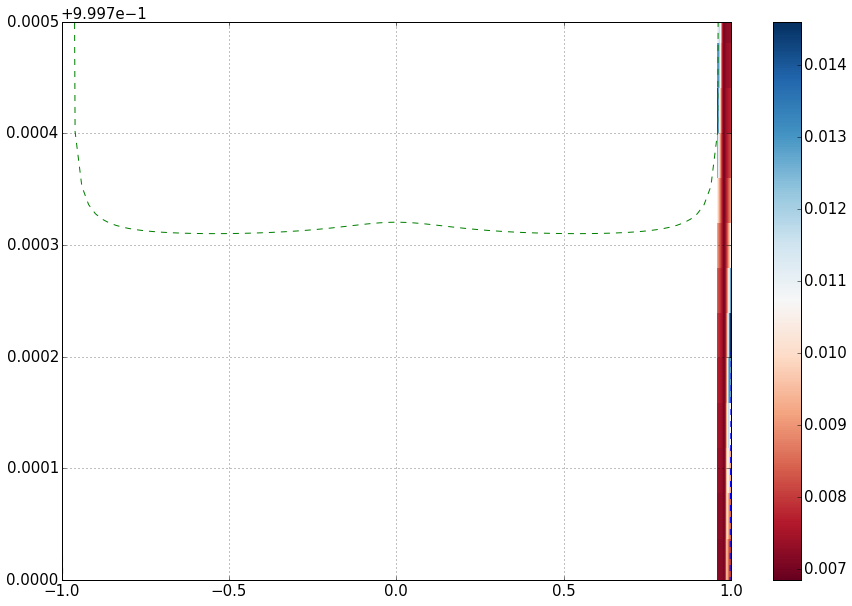

In [89]:
XX, YY = np.meshgrid(loaded[0], loaded[1])
plt.pcolor(XX, YY, loaded[2].T, cmap="RdBu")#, 200, cmap="RdBu")#, norm=MidpointNorm(3, vmin=1, vmax = 4.5))#, cmap='RdBu_r')
plt.plot(X/omega_r, np.array(freqs1)/omega_r, "--")
plt.plot(X/omega_r, np.array(freqs2)/omega_r, "--")
plt.gcf().set_size_inches(15,10)
plt.xlim(-1.0, 1)
plt.ylim(0.9997, 1.0002)
plt.colorbar()
plt.grid()

In [220]:
g = 0.0025*omega_r

In [200]:
aa = evals(omega_q=0.2*omega_r, delta=0.98*omega_r)/omega_r

In [202]:
aa[2]-aa[1]

0.0010196411350001933

In [176]:
rm -f *pyx

In [35]:
build_H_undr(omega_q=0.2*omega_r, delta = omega_r).eigenenergies()

array([ -0.06251769,   6.22006688,   6.34569998,  12.50355408,
        12.62948905,  18.91237547])

In [36]:
build_H_undr(omega_q=0.2*omega_r, delta = -omega_r).eigenenergies()

array([ -0.06251769,   6.22006688,   6.34569998,  12.50355408,
        12.62948905,  18.91237547])

# Эволюция систем

## Linewidth

### Lindbladian master equation

In [46]:

args={'omega_f':0}

omega_fs = np.linspace(0.999*omega_r, omega_r*1.001, 20)

N=3
kappa = 5e-4
gamma_rel = .02
gamma_deph =.01
g=0.007*omega_r
A = 1e-5
T_end = 5000
Ts = np.linspace(0, T_end, 800)
opts = Options()
opts.nsteps = 5000
opts.rhs_reuse = True
rhs_clear()

def task(omega_f):
    args["omega_f"]=omega_f
    result = mesolve([build_H_undr(omega_q=0.2*omega_r, delta=coeff*omega_r), 
                        build_H_dr(0, T_end)], evecs(omega_q=0.2*omega_r, delta=coeff*omega_r)[0],  Ts,
                        build_c_ops() , [],
                        args, options=opts)
    return result

coeff = 0.97975
outputs1 = parallel_map(task, omega_fs, progress_bar=True, num_cpus = 2)

10.0%. Run time:  19.24s. Est. time left: 00:00:02:53
20.0%. Run time:  37.79s. Est. time left: 00:00:02:31
30.0%. Run time:  53.58s. Est. time left: 00:00:02:05
40.0%. Run time:  71.67s. Est. time left: 00:00:01:47
50.0%. Run time:  89.68s. Est. time left: 00:00:01:29
60.0%. Run time: 106.41s. Est. time left: 00:00:01:10
70.0%. Run time: 121.67s. Est. time left: 00:00:00:52
80.0%. Run time: 137.55s. Est. time left: 00:00:00:34
90.0%. Run time: 155.51s. Est. time left: 00:00:00:17
100.0%. Run time: 172.71s. Est. time left: 00:00:00:00
Total run time: 172.77s


In [47]:
results1 = [abs(expect(tensor(a(), identity(2)), output.states[-1])) for  output in outputs1]

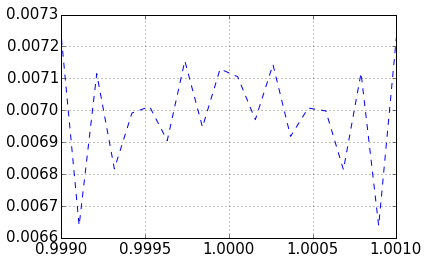

In [48]:
# plt.plot(omega_fs/omega_r, [output.expect[0][-1] for output in outputs], '-')
plt.plot(omega_fs/omega_r, results1, '--')
plt.grid()
#T = 10k gamma_rel=0.03

### Propagator (evolution operator)

In [80]:
evals(omega_q=0.2*omega_r, delta=0.97975*omega_r)/omega_r

array([ -2.55351152e-05,   9.98551887e-01,   1.00135208e+00,
         1.99804195e+00,   2.00200607e+00,   3.00007355e+00])

In [83]:
(evals(omega_q=0.2*omega_r, delta=0.97975*omega_r)[2]-evals(omega_q=0.2*omega_r, delta=0.97975*omega_r)[0])/omega_r

1.0013776140938615

In [81]:


N=3
kappa = 5e-5
gamma_rel = .001
gamma_deph =.001
g=0.007*omega_r
A = 5e-5
T_end = 8000
Ts = np.linspace(0, T_end, 800)
opts = Options()
opts.nsteps = 5000
opts.rhs_reuse = True
rhs_clear()

args={}

omega_fs = np.linspace(0.998*omega_r, omega_r*1.002, 100)


def task(omega_f):
    args["omega_f"]=omega_f
    T = 2*pi/omega_f 
    H = liouvillian(build_H_undr(omega_q=0.2*omega_r, delta=coeff*omega_r), c_ops_new)
   
    U = propagator([H, build_H_dr(-100, 1e3)], T, [], args, options=opts)
    psi_st = propagator_steadystate(U)
    
    return abs(expect(tensor(a(), identity(2)), psi_st))

coeff = -0.97975
c_ops_new = build_c_ops_new(omega_q=0.2*omega_r, delta = coeff*omega_r)
outputs = parallel_map(task, omega_fs, progress_bar=True, num_cpus = 2)
# coeff = -0.96
# c_ops_new = build_c_ops()#_new(omega_q=0.2*omega_r, delta = coeff*omega_r)
# outputs1 = parallel_map(task, omega_fs, progress_bar=True, num_cpus = 2)
# coeff = -1
# c_ops_new = build_c_ops()#_new(omega_q=0.2*omega_r, delta = coeff*omega_r)
# outputs2 = parallel_map(task, omega_fs, progress_bar=True, num_cpus = 2)
# coeff = -0.9775
# c_ops_new = build_c_ops()#_new(omega_q=0.2*omega_r, delta = coeff*omega_r)
# outputs3 = parallel_map(task, omega_fs, progress_bar=True, num_cpus = 2)
# coeff = -0.9825
# c_ops_new = build_c_ops()#_new(omega_q=0.2*omega_r, delta = coeff*omega_r)
# outputs4 = parallel_map(task, omega_fs, progress_bar=True, num_cpus = 2)

10.0%. Run time:   6.64s. Est. time left: 00:00:00:59
20.0%. Run time:  10.93s. Est. time left: 00:00:00:43
30.0%. Run time:  15.17s. Est. time left: 00:00:00:35
40.0%. Run time:  19.46s. Est. time left: 00:00:00:29
50.0%. Run time:  24.13s. Est. time left: 00:00:00:24
60.0%. Run time:  28.43s. Est. time left: 00:00:00:18
70.0%. Run time:  32.69s. Est. time left: 00:00:00:14
80.0%. Run time:  37.15s. Est. time left: 00:00:00:09
90.0%. Run time:  41.52s. Est. time left: 00:00:00:04
100.0%. Run time:  45.73s. Est. time left: 00:00:00:00
Total run time:  45.80s


In [67]:
outputs[0]

0.011540578599476875

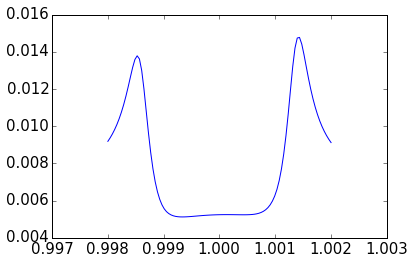

In [76]:
plt.plot(omega_fs/omega_r, outputs, '-')
# plt.plot(omega_fs/omega_r, outputs1, '--')
# plt.plot(omega_fs/omega_r, outputs2, '--')
# plt.plot(omega_fs/omega_r, outputs3, ':')
# plt.plot(omega_fs/omega_r, outputs4, ':')

# gamma_deph = 0
# plt.xlim(.998,1.002)
# plt.ylim(0, 0.015)

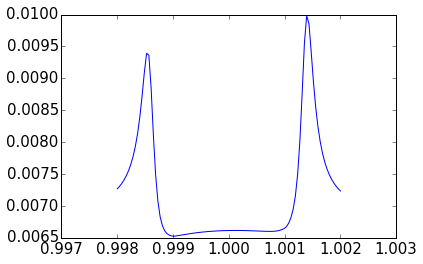

In [82]:
plt.plot(omega_fs/omega_r, outputs, '-')
# plt.plot(omega_fs/omega_r, outputs1, '--')
# plt.plot(omega_fs/omega_r, outputs2, '--')
# plt.plot(omega_fs/omega_r, outputs3, ':')
# plt.plot(omega_fs/omega_r, outputs4, ':')
# plt.ylim(0.006, 0.008)

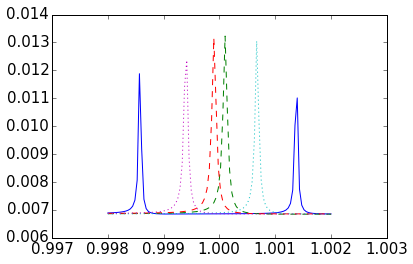

In [48]:
plt.plot(omega_fs/omega_r, outputs, '-')
plt.plot(omega_fs/omega_r, outputs1, '--')
plt.plot(omega_fs/omega_r, outputs2, '--')
plt.plot(omega_fs/omega_r, outputs3, ':')
plt.plot(omega_fs/omega_r, outputs4, ':')
# plt.ylim(0.006, 0.008)

In [30]:
rm -f *.pyx

## Climbing JC ladder

In [62]:
projections = []
for state in states:
    projection = []
    for system_state in result.states:
        obj = state.dag()*system_state
        projection.append(abs(obj.data.toarray()[0,0])**2)
    projections.append(projection)

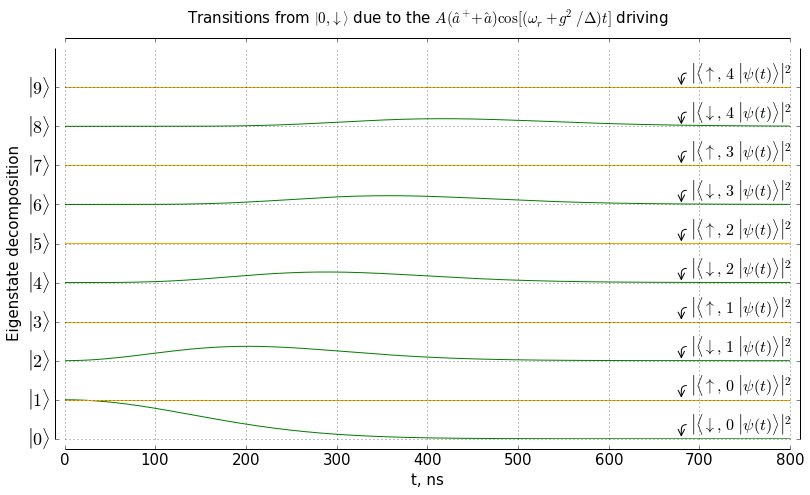

In [367]:
for idx, projection in enumerate(projections[:10]):
    plt.plot(Ts, np.array(projection)+idx, "green" if idx%2==0 else "orange")
    annotation = r'$\left|\left.\langle %s,\ %d\ \right |\psi(t)\rangle\right|^2$'%(\
                r"\uparrow" if idx%2!=0 else r"\downarrow", idx//2)
    plt.annotate(annotation,\
                     (680, idx), \
                     (690, idx+0.2), \
                     arrowprops={'arrowstyle':'->', \
                    'connectionstyle':"angle,angleA=0,angleB=90,rad=5"},  fontsize=16)
    

dict(plt.gca().spines.items())["left"].set_position(('outward', 10))
dict(plt.gca().spines.items())["bottom"].set_position(('outward', 10))
dict(plt.gca().spines.items())["top"].set_position(('outward', 10))
dict(plt.gca().spines.items())["right"].set_position(('outward', 10))
plt.ylim(0, 10)
plt.xlabel("t, ns", fontsize=15)
plt.ylabel("Eigenstate decomposition", fontsize=15)
plt.yticks(range(0, 10), [r'$\left|%d\rangle\right.$'%n for n in range(0,10)], fontsize=18)
plt.gcf().set_size_inches(13,7)
plt.title(r"Transition from $\left|0,\downarrow\right\rangle$ due to the $A(\hat{a}^+\! +\hat a)\cos[(\omega_r+g^2/\Delta) t]$ driving",
          position=(0.5, 1.05), fontsize=15)
plt.grid()

## Q-R decoherence

In [97]:
g=0.01*omega_r

In [98]:
build_H_undr(omega_q=omega_r)

Quantum object: dims = [[5, 2], [5, 2]], shape = [10, 10], type = oper, isherm = True
Qobj data =
[[  6.28318531   0.           0.           0.06283185   0.           0.
    0.           0.           0.           0.        ]
 [  0.           0.           0.06283185   0.           0.           0.
    0.           0.           0.           0.        ]
 [  0.           0.06283185  12.56637061   0.           0.           0.08885766
    0.           0.           0.           0.        ]
 [  0.06283185   0.           0.           6.28318531   0.08885766   0.
    0.           0.           0.           0.        ]
 [  0.           0.           0.           0.08885766  18.84955592   0.
    0.           0.10882796   0.           0.        ]
 [  0.           0.           0.08885766   0.           0.          12.56637061
    0.10882796   0.           0.           0.        ]
 [  0.           0.           0.           0.           0.           0.10882796
   25.13274123   0.           0.           0

### Old dissipators

In [10]:
N = 10
g=0.1*omega_r

In [16]:
evals(omega_q=.2*omega_r, delta = 0.97975*omega_r)

array([ -6.14499168e-02,   6.09824808e+00,   6.34478323e+00,
         1.23336535e+01,   1.26755674e+01,   1.85824150e+01,
         1.89930036e+01,   2.48384250e+01,   2.53031991e+01,
         3.10992631e+01,   3.16085745e+01,   3.73636600e+01,
         3.79104006e+01,   4.36309812e+01,   4.42096558e+01,
         4.99105070e+01,   5.05212404e+01,   5.63517657e+01,
         5.72423514e+01,   6.33622861e+01])

In [17]:
args = {"omega_f":evals(omega_q=omega_r)[2]-evals(omega_q=omega_r)[0]}

In [19]:
tensor(identity(N), sigmax()).matrix_element(evecs(omega_q=omega_r)[2], evecs(omega_q=omega_r)[0])

(0.68908330820520014+0j)

In [26]:
%%time
opts = Options(rhs_reuse=True)
rhs_clear()
N=3
kappa = 0.0001
gamma_rel = .01
gamma_deph =.000
g=0.01*omega_r
A = 0.0001
T_end = 5000
Ts = np.linspace(0, T_end, 800)
coeff = 0.97975
c_ops=build_c_ops()

H = liouvillian(build_H_undr(omega_q = omega_r), c_ops)
result = mesolve(H, evecs(omega_q = omega_r)[1],  Ts,
                        [],  [build_H_undr(omega_q = omega_r)], args=args, options=opts)

CPU times: user 6.55 s, sys: 134 ms, total: 6.68 s
Wall time: 6.53 s


(0, 2000)

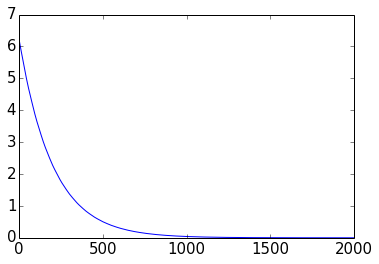

In [27]:
plt.plot(Ts, result.expect[0])
plt.xlim(0,2000)

In [14]:
U = propagator(H,  1/2/pi, {}, progress_bar=True)

10.0%. Run time:   0.08s. Est. time left: 00:00:00:00
20.0%. Run time:   0.15s. Est. time left: 00:00:00:00
30.0%. Run time:   0.21s. Est. time left: 00:00:00:00
40.0%. Run time:   0.26s. Est. time left: 00:00:00:00
50.0%. Run time:   0.31s. Est. time left: 00:00:00:00
60.0%. Run time:   0.36s. Est. time left: 00:00:00:00
70.0%. Run time:   0.42s. Est. time left: 00:00:00:00
80.0%. Run time:   0.47s. Est. time left: 00:00:00:00
90.0%. Run time:   0.52s. Est. time left: 00:00:00:00
Total run time:   0.57s


### New dissipators

In [16]:
H = build_H_undr(omega_q = omega_r, delta=0)

In [17]:
evals(omega_q = omega_r, delta=0)

array([ -0.83747661,   2.3880853 ,   7.52926835,   8.33454136,
        13.35989566,  15.54999754,  20.89790645,  23.25639975,
        32.25852795,  34.34248692])

In [78]:
def build_c_ops_new(omega_q = .6*omega_r, delta=0):
    def abs_sq(qobj):
        return qobj.dag()*qobj
    c_ops = []
    c_op_kappa_base = tensor(a().dag()+a(), identity(2))
    c_op_gamma_rel_base = tensor(identity(N), sigmax())
    c_op_gamma_deph_base = tensor(identity(N), sigmaz())
    c_op_gamma_deph_jj = 0
    
    evecs_ = evecs(omega_q, delta)
    for i in range(0, 2*N):
        for j in range(0, 2*N):
            if j>i:
                Gamma_ij_kappa = sqrt(kappa)*c_op_kappa_base.matrix_element(evecs_[i].dag(), evecs_[j])
                Gamma_ij_gamma_rel = sqrt(gamma_rel)*c_op_gamma_rel_base.matrix_element(evecs_[i].dag(), evecs_[j])
                
                if Gamma_ij_kappa != 0:
                    c_ops.append(Gamma_ij_kappa*evecs_[i]*evecs_[j].dag())
                if Gamma_ij_gamma_rel != 0:
                    c_ops.append(Gamma_ij_gamma_rel*evecs_[i]*evecs_[j].dag())
            if j != i:
                Gamma_ij_gamma_deph=sqrt(gamma_deph)*c_op_gamma_deph_base.matrix_element(evecs_[i].dag(), evecs_[j])
                if Gamma_ij_gamma_deph!=0:
                    c_ops.append(Gamma_ij_gamma_deph*evecs_[i]*evecs_[j].dag())
            if j == i:
                Gamma_ij_gamma_deph = sqrt(gamma_deph) * c_op_gamma_deph_base.matrix_element(evecs_[i].dag(), evecs_[i])
#                 if Gamma_ij_gamma_deph != 0:
#                     c_op_gamma_deph_jj+= Gamma_ij_gamma_deph*evecs_[i]*evecs_[i].dag()
    if c_op_gamma_deph_jj!=0:
        c_ops.append(c_op_gamma_deph_jj)
    return c_ops

In [216]:
g = 0.01*omega_r

In [190]:
N=4

In [226]:
evals(omega_q=.2*omega_r, delta=0.97975*omega_r)

array([ -4.74476262e-04,   6.27000438e+00,   6.29513472e+00,
         1.25479892e+01,   1.25835209e+01,   1.88283684e+01,
         1.88719750e+01,   2.51344469e+01])

In [233]:
tensor(a(), identity(2)).matrix_element(evecs(omega_q=.2*omega_r, delta=0.97975*omega_r)[2],
                                                  evecs(omega_q=.2*omega_r, delta=0.97975*omega_r)[0])

(-0.00070196713625101878+0j)

In [250]:
(evals(omega_q=.2*omega_r, delta=0.97975*omega_r)[2]-evals(omega_q=.2*omega_r, delta=0.97975*omega_r)[0])/omega_r

1.0019773374861227

In [136]:
args = {"omega_f":(evals(omega_q=.2*omega_r, delta=0.97975*omega_r)[1]-evals(omega_q=.2*omega_r, delta=0.97975*omega_r)[0])}

In [150]:
%%time

opts = Options(rhs_reuse=True)
rhs_clear()

N=3
kappa = 0.0001
gamma_rel = .01
gamma_deph =.000
g=0.01*omega_r
A = 0.0001
T_end = 5000
Ts = np.linspace(0, T_end, 800)
coeff = 0.97975

c_ops=build_c_ops()#_new(omega_q = .2*omega_r, delta=0.97975*omega_r)

H = liouvillian(build_H_undr(omega_q = .2*omega_r, delta=0.97975*omega_r), c_ops)

args['omega_f']=(evals(omega_q=.2*omega_r, delta=0.97975*omega_r)[1]-evals(omega_q=.2*omega_r, delta=0.97975*omega_r)[0])
result_tot1 = mesolve([H
                  , build_H_dr(-100, 2e4)], evecs(omega_q = .2*omega_r, delta=0.97975*omega_r)[0],  Ts,
                        [], [], options=opts, args=args, progress_bar=True)

args['omega_f']=(evals(omega_q=.2*omega_r, delta=0.97975*omega_r)[2]-evals(omega_q=.2*omega_r, delta=0.97975*omega_r)[0])
result_tot2 = mesolve([H
                  , build_H_dr(-100, 2e4)], evecs(omega_q = .2*omega_r, delta=0.97975*omega_r)[0],  Ts,
                        [], [], options=opts, args=args, progress_bar=True)

args['omega_f']=(evals(omega_q=.2*omega_r, delta=0.97975*omega_r)[1]-evals(omega_q=.2*omega_r, delta=0.97975*omega_r)[0])
result_dr1 = mesolve([build_H_undr(omega_q=.2*omega_r, delta=0.97975*omega_r)
                  , build_H_dr(-100, 2e4)], evecs(omega_q = .2*omega_r, delta=0.97975*omega_r)[0],  Ts,
                        [], [], options=opts, args=args, progress_bar=True)

args['omega_f']=(evals(omega_q=.2*omega_r, delta=0.97975*omega_r)[2]-evals(omega_q=.2*omega_r, delta=0.97975*omega_r)[0])
result_dr2 = mesolve([build_H_undr(omega_q=.2*omega_r, delta=0.97975*omega_r)
                  , build_H_dr(-100, 2e4)], evecs(omega_q = .2*omega_r, delta=0.97975*omega_r)[0],  Ts,
                        [], [], options=opts, args=args, progress_bar=True)

result_dec1 = mesolve(H, evecs(omega_q = .2*omega_r, delta=0.97975*omega_r)[1],  Ts,
                        [], [], options=opts, args=args, progress_bar=True)

result_dec2 = mesolve(H, evecs(omega_q = .2*omega_r, delta=0.97975*omega_r)[2],  Ts,
                        [], [], options=opts, args=args, progress_bar=True)

10.0%. Run time:   2.95s. Est. time left: 00:00:00:26
20.0%. Run time:   5.07s. Est. time left: 00:00:00:20
30.0%. Run time:   6.85s. Est. time left: 00:00:00:15
40.0%. Run time:   8.78s. Est. time left: 00:00:00:13
50.0%. Run time:  10.50s. Est. time left: 00:00:00:10
60.0%. Run time:  12.44s. Est. time left: 00:00:00:08
70.0%. Run time:  14.15s. Est. time left: 00:00:00:06
80.0%. Run time:  16.09s. Est. time left: 00:00:00:04
90.0%. Run time:  17.87s. Est. time left: 00:00:00:01
Total run time:  19.92s
10.0%. Run time:   3.32s. Est. time left: 00:00:00:29
20.0%. Run time:   5.54s. Est. time left: 00:00:00:22
30.0%. Run time:   7.43s. Est. time left: 00:00:00:17
40.0%. Run time:   9.20s. Est. time left: 00:00:00:13
50.0%. Run time:  11.01s. Est. time left: 00:00:00:11
60.0%. Run time:  12.77s. Est. time left: 00:00:00:08
70.0%. Run time:  14.53s. Est. time left: 00:00:00:06
80.0%. Run time:  16.29s. Est. time left: 00:00:00:04
90.0%. Run time:  18.40s. Est. time left: 00:00:00:02
Tota

In [151]:
# expects = [abs(expect(tensor(a(),identity(2)), state)) for state in result.states]
H1 = build_H_undr(omega_q = .2*omega_r, delta=0.97975*omega_r)
expects_tot1 =[expect(H1, state) for state in result_tot1.states]
expects_tot2 =  [expect(H1, state) for state in result_tot2.states]
expects_dr1 = [expect(H1, state) for state in result_dr1.states]
expects_dr2 = [expect(H1, state) for state in result_dr2.states]
expects_dec1 = [expect(H1, state) for state in result_dec1.states]
expects_dec2 = [expect(H1, state) for state in result_dec2.states]


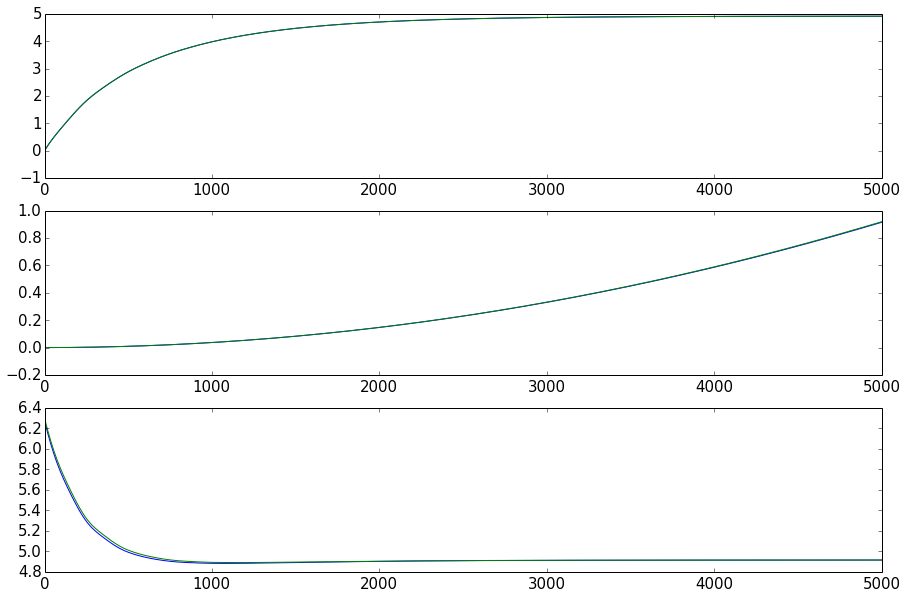

In [152]:
fig, axes = plt.subplots(nrows = 3)
axes[0].plot(Ts, expects_tot1, '-')
axes[0].plot(Ts, expects_tot2, '-')
axes[1].plot(Ts, expects_dr1, '-')
axes[1].plot(Ts, expects_dr2, '-')
axes[2].plot(Ts, expects_dec1, '-')
axes[2].plot(Ts, expects_dec2, '-')

plt.gcf().set_size_inches(15,10)

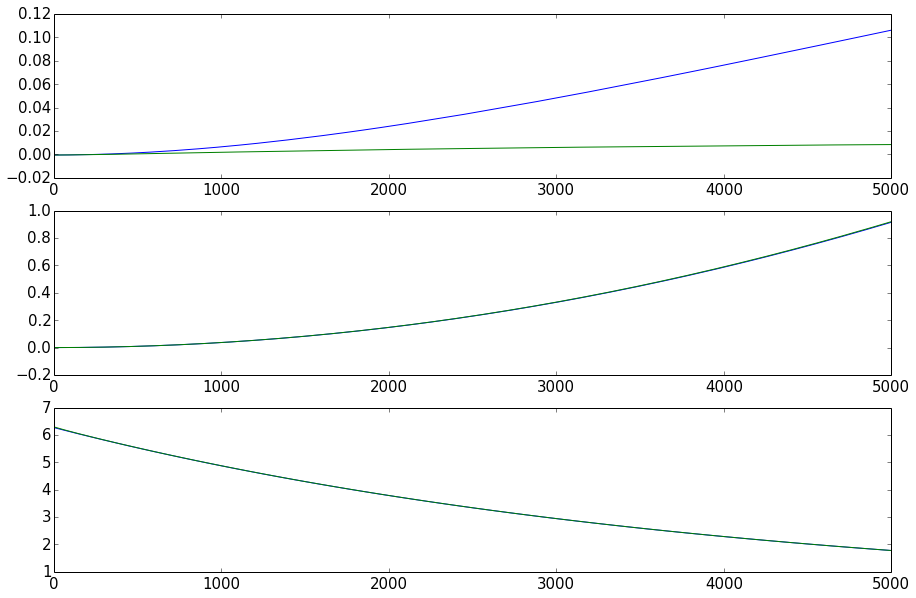

In [148]:
fig, axes = plt.subplots(nrows = 3)
axes[0].plot(Ts, expects_tot1, '-')
axes[0].plot(Ts, expects_tot2, '-')
axes[1].plot(Ts, expects_dr1, '-')
axes[1].plot(Ts, expects_dr2, '-')
axes[2].plot(Ts, expects_dec1, '-')
axes[2].plot(Ts, expects_dec2, '-')

plt.gcf().set_size_inches(15,10)

In [133]:
U = propagator([H, build_H_dr(-100, 1e4)],  7*2*pi/args["omega_f"], [], args=args, progress_bar=True)

11.1%. Run time:   1.73s. Est. time left: 00:00:00:13
22.2%. Run time:   1.95s. Est. time left: 00:00:00:06
30.6%. Run time:   2.13s. Est. time left: 00:00:00:04
41.7%. Run time:   2.35s. Est. time left: 00:00:00:03
50.0%. Run time:   2.51s. Est. time left: 00:00:00:02
61.1%. Run time:   2.73s. Est. time left: 00:00:00:01
72.2%. Run time:   2.98s. Est. time left: 00:00:00:01
80.6%. Run time:   3.14s. Est. time left: 00:00:00:00
91.7%. Run time:   3.37s. Est. time left: 00:00:00:00
Total run time:   3.51s


In [134]:
rho = propagator_steadystate(U)

In [135]:
# abs(expect(tensor(a(),identity(2)), rho))
abs(expect(build_H_undr(omega_q = .2*omega_r, delta=0.97975*omega_r), rho))

0.012275041503031846

# Parity

In [93]:
P1 = (log(-1+0j)*(tensor(a().dag()*a(),identity(2)))).expm()

In [158]:
P2 = (log(-1+0j)*(tensor(identity(N), sigmam()*sigmap()))).expm()

In [117]:
g=0.5*omega_r

In [118]:
for i in range(0, 10):
    print(expect(P1*P2, evecs(omega_q=omega_r)[i]))

-0.9999999999999999
1.0000000000000002
-1.0
1.0000000000000002
1.0000000000000002
-0.9999999999999999
-1.0000000000000004
1.0
-1.0
1.0


In [160]:
g=0.5*omega_r

In [166]:
state = tensor(a().dag()+a(), identity(2))*evecs(omega_q=omega_r)[0]
print(expect(P1*P2, evecs(omega_q=omega_r)[0]))
expect(P1*P2, state)

-1.0000000000000002


1.4533896462015705

# Single qubit

In [51]:
from matplotlib import cm

In [108]:
H = omega_q/2 * sigmaz()

In [189]:
gamma_rel = 0.1
gamma_deph = 0.1

In [190]:
Ts = np.linspace(0,30, 1000)
result = mesolve(H, 1/np.sqrt(2)*(basis(2,0)+basis(2,1)), Ts, [np.sqrt(gamma_deph)*sigmaz(), np.sqrt(gamma_rel)*sigmam()],
                 [sigmax(), sigmay(), sigmaz()])

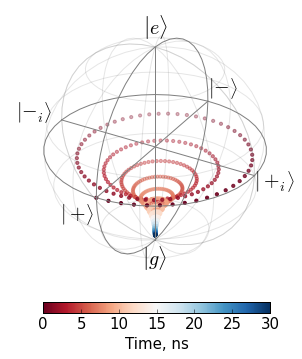

In [191]:
nrm=matplotlib.colors.Normalize(0,Ts[-1])
colors=cm.RdBu(nrm(Ts))

fig = plt.figure(figsize=(5,5))
axes = fig.add_axes([0.1, 0.2, 0.8, 0.8], projection="3d")
sph = Bloch(fig=fig, axes=axes)
sph.sphere_alpha = 0
sph.zlabel = [r'$\left|e\rightangle\right.$', r"$\left|g\rightangle\right.$"]
sph.xlpos = [1.3, -1.3]
sph.xlabel = [r'$\left.|+\right\rangle$', r"$\left.|-\right\rangle$"]
sph.ylpos = [1.2, -1.3]
sph.ylabel = [r'$\left.|+_i\right\rangle$', r"$\left.|-_i\right\rangle$"]
sph.xlpos = [1.3, -1.3]
sph.point_size=[40]
# axes.view_init(elev=0)

sph.point_color = list(colors)
sph.point_marker=['.']
sph.add_points(result.expect, meth='m')
sph.render(fig, axes)
m = cm.ScalarMappable(cmap=cm.RdBu, norm=nrm)
m.set_array(Ts)
position=fig.add_axes([0.2,0.15,0.63,0.03])
cb = fig.colorbar(m, orientation='horizontal', cax=position)
cb.set_label("Time, ns")
cb.set_ticks(range(0,31,5))

In [167]:
def D(O, rho):
    return O*rho*O.dag() - 1/2*(O.dag()*O*rho - rho*O.dag()*O)

In [178]:
basis(2,0)*basis(2,0).dag()

Quantum object: dims = [[2], [2]], shape = [2, 2], type = oper, isherm = True
Qobj data =
[[ 1.  0.]
 [ 0.  0.]]

In [179]:
D(sigmam(), basis(2,0)*basis(2,0).dag())

Quantum object: dims = [[2], [2]], shape = [2, 2], type = oper, isherm = True
Qobj data =
[[ 0.  0.]
 [ 0.  1.]]

# TMP

In [234]:
plus = 1/sqrt(2)*(tensor(basis(2,0), basis(3,1))+tensor(basis(2,1), basis(3,0)))

In [235]:
A = plus*plus.dag()

In [259]:
rho_A = np.ndarray((2,2))
for n in range(0, 2):
    for m in range(0,2):
        for i in range(0,3):
            rho_A[n,m] += (tensor(basis(2,n), basis(3,i)).dag()*A*tensor(basis(2,m), basis(3,i)))[0][0][0]

In [260]:
rho_A

array([[ 0.5,  0. ],
       [ 0. ,  0.5]])

In [254]:
A

Quantum object: dims = [[2, 3], [2, 3]], shape = [6, 6], type = oper, isherm = True
Qobj data =
[[ 0.   0.   0.   0.   0.   0. ]
 [ 0.   0.5  0.   0.5  0.   0. ]
 [ 0.   0.   0.   0.   0.   0. ]
 [ 0.   0.5  0.   0.5  0.   0. ]
 [ 0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0. ]]

In [250]:
A

Quantum object: dims = [[2, 3], [2, 3]], shape = [6, 6], type = oper, isherm = True
Qobj data =
[[ 0.   0.   0.   0.   0.   0. ]
 [ 0.   0.5  0.   0.5  0.   0. ]
 [ 0.   0.   0.   0.   0.   0. ]
 [ 0.   0.5  0.   0.5  0.   0. ]
 [ 0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0. ]]